# Milestone 2
- merge each one's dataset
- descriptive statistics
- visualization (put all vis into another notebook)
- pipeline
- regression


## 1. Rename the datasets

In [2]:
import pandas as pd 

In [3]:
df_agri = pd.read_csv('../data/processed/Agriculture_data.csv')
#df_mobile = pd.read_csv('../data/processed/IMF_mobilemoney.csv')
df_con = pd.read_csv('../data/processed/control_var.csv')
df_gfi = pd.read_csv('../data/processed/merged_output_wide.csv')
df_staple = pd.read_csv('../data/processed/StapleFoodStability_adjusted.csv')
df_access= pd.read_csv('../data/processed/access_merged.csv')


In [4]:
df_agri.head(5)

,code,year,FarmCredit,ICTPolicy,ProductionValue,ProcessingValue,Fertilizer
0,BGD,2000,NaN,NaN,583661.0,NaN,158.108
1,BGD,2001,NaN,NaN,590372.0,NaN,174.590
2,BGD,2002,3178.321934,NaN,599004.0,NaN,188.639
3,BGD,2003,2942.973463,NaN,630569.0,NaN,160.267
4,BGD,2004,2974.393198,NaN,672025.0,NaN,170.671


In [5]:
# rename df_agri
df_agri = df_agri.rename(columns={'areaCode': 'code'})
df_agri.head(5)
#save df_agri
#df_agri.to_csv('../data/processed/agriculture_data.csv', index=False)


,code,year,FarmCredit,ICTPolicy,ProductionValue,ProcessingValue,Fertilizer
0,BGD,2000,NaN,NaN,583661.0,NaN,158.108
1,BGD,2001,NaN,NaN,590372.0,NaN,174.590
2,BGD,2002,3178.321934,NaN,599004.0,NaN,188.639
3,BGD,2003,2942.973463,NaN,630569.0,NaN,160.267
4,BGD,2004,2974.393198,NaN,672025.0,NaN,170.671


In [6]:
df_access.head(5)

,code,year,Rural Access to Electricity(Percent of Population),Mobile Cellular Subscriptions (per 100 people),Fixed Broadband Subsciptions (per 100 people)
0,BGD,1970,NaN,NaN,NaN
1,BGD,1970,99.6,NaN,7.51447
2,BGD,1970,99.2,105.264249,7.17020
3,BGD,1970,98.5,108.909443,6.64247
4,BGD,1970,95.2,105.291163,6.04506


In [ ]:
# reformat the year in df_access
# Convert full date (YYYY-MM-DD) to just year (YYYY)
df_access['year'] = pd.to_datetime(df_access['year']).dt.year

df_access = df_access.rename(columns={'country': 'code'})
df_access.head(5)
#save df_access
#df_access.to_csv('../data/processed/access_merged.csv', index=False)


In [39]:
df_con.head(5)

,country,code,year,"Fertility rate, total (births per woman)","GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),Rural population (% of total population),Urban population (% of total population)
0,Bangladesh,BGD,1960,6.742,NaN,43.980,178.6,NaN,NaN,51828660.0,NaN,94.865,5.135
1,Bangladesh,BGD,1961,6.780,NaN,44.887,173.3,409.544042,2.818718,53310348.0,NaN,94.722,5.278
2,Bangladesh,BGD,1962,6.806,NaN,45.765,168.4,421.611324,2.903941,54881146.0,NaN,94.502,5.498
3,Bangladesh,BGD,1963,6.798,NaN,45.722,163.7,434.081601,2.914868,56504402.0,NaN,94.273,5.727
4,Bangladesh,BGD,1964,6.785,NaN,46.752,159.4,446.941492,2.919516,58178374.0,NaN,94.036,5.964


In [40]:
df_gfi.head(5)

,code,year,Account (% age 15+),Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)","Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, richest 60% (% of population ages 15+)",...,"Used a mobile phone or the internet to check account balance(% with a financial institution account, age 15+)","Used a mobile phone or the internet to pay bills, female (% age 15+)","Used a mobile phone or the internet to pay bills, male (% age 15+)","Used a mobile phone or the internet to pay bills, rural (% age 15+)","Used a mobile phone or the internet to pay bills, urban (% age 15+)",Used a mobile phone or the internet to send money (% age 15+),"Used a mobile phone or the internet to send money, female (% age 15+)","Used a mobile phone or the internet to send money, male (% age 15+)","Used a mobile phone or the internet to send money, rural (% age 15+)","Used a mobile phone or the internet to send money, urban (% age 15+)"
0,BGD,2024,NaN,..,..,..,..,..,..,..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BGD,2023,NaN,..,..,..,..,..,..,..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BGD,2022,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,BGD,2021,52.81,52.81,43.46,62.86,54.55,48.65,46.57,55.57,...,16.3,4.72,16.77,8.75,11.08,17.58,7.64,28.28,19.96,16.83
4,BGD,2020,NaN,..,..,..,..,..,..,..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_gfi = df_gfi.rename(columns={'country': 'code'})
df_gfi.head(5)
#save df_gfi
#df_gfi.to_csv('../data/processed/merged_output_wide.csv', index=False)

In [28]:
df_staple.head(5)

,code,year,Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer,Food supply quantity (kg/capita/yr)_Starchy Roots,rolling_std
0,AFG,2010,202.73,6.69,NaN
1,AFG,2011,197.29,5.72,NaN
2,AFG,2012,190.31,6.40,NaN
3,AFG,2013,193.09,14.55,NaN
4,AFG,2014,190.09,13.46,5.345682


In [ ]:
# drop Unnamed: 0 column
#df_staple = df_staple.drop(columns=['Unnamed: 0'])
df_staple = df_staple.rename(columns={'country': 'code'})
df_staple.head(5)
# save df_staple
#df_staple.to_csv('../data/processed/StapleFoodStability_adjusted.csv', index=False)


## 2. Set index

In [7]:
def set_index(df_agri, df_access, df_con, df_gfi, df_staple):
    """Sets 'code' and 'year' as the index for DataFrames."""
    df_agri = df_agri.set_index(['code', 'year'])
    df_access = df_access.set_index(['code', 'year'])
    df_con = df_con.set_index(['code', 'year'])
    df_gfi= df_gfi.set_index(['code', 'year'])
    df_staple = df_staple.set_index(['code', 'year'])
    return df_agri, df_access, df_con, df_gfi, df_staple
# Set index for all DataFrames
df_agri_indexed, df_access_indexed, df_con_indexed, df_gfi_indexed, df_staple_indexed = set_index(df_agri.copy(), df_access.copy(), df_con.copy(), df_gfi.copy(), df_staple.copy())

## 3. Merge

In [8]:
def merge_data(df_agri, df_access, df_con, df_gfi, df_staple):
    """
    Merges 5 DataFrames on a common MultiIndex ('code', 'year').
    All input DataFrames must be indexed on ['code', 'year'].
    """
    df_merged = pd.merge(df_agri, df_access, left_index=True, right_index=True, how='outer')
    df_merged = pd.merge(df_merged, df_con, left_index=True, right_index=True, how='outer')
    df_merged = pd.merge(df_merged, df_gfi, left_index=True, right_index=True, how='outer')
    df_merged = pd.merge(df_merged, df_staple, left_index=True, right_index=True, how='outer')
    
    return df_merged


In [9]:

# Merge all datasets
df_merged = merge_data(df_agri_indexed, df_access_indexed, df_con_indexed, df_gfi_indexed, df_staple_indexed)


In [10]:
df_merged.head(30)
# save merged data
df_merged.to_csv('../data/processed/merged_data.csv', index=True)

## 4. trim data

In [11]:
# Filter by year range
df_filtered = df_merged.reset_index()  # If 'year' is in the index, bring it back as a column
df_filtered = df_filtered[df_filtered['year'].between(2011, 2024)]

# (Optional) set index back if needed
df_filtered = df_filtered.set_index(['code', 'year'])

# Check the result
print(df_filtered.shape)
df_filtered.head()



(314, 130)


FarmCredit  ICTPolicy  ProductionValue  ProcessingValue  \
code year                                                            
AFG  2011         NaN        NaN              NaN              NaN   
     2012         NaN        NaN              NaN              NaN   
     2013         NaN        NaN              NaN              NaN   
     2014         NaN        NaN              NaN              NaN   
     2015         NaN        NaN              NaN              NaN   

           Fertilizer  Rural Access to Electricity(Percent of Population)  \
code year                                                                   
AFG  2011         NaN                                                NaN    
     2012         NaN                                                NaN    
     2013         NaN                                                NaN    
     2014         NaN                                                NaN    
     2015         NaN                                                NaN    

           Mobile Cellular Subscriptions (per 100 people)  \
code year                                                   
AFG  2011                                             NaN   
     2012                                             NaN   
     2013                                             NaN   
     2014                                             NaN   
     2015                                             NaN   

           Fixed Broadband Subsciptions (per 100 people) country  \
code year                                                          
AFG  2011                                            NaN     NaN   
     2012                                            NaN     NaN   
     2013                                            NaN     NaN   
     2014                                            NaN     NaN   
     2015                                            NaN     NaN   

           Fertility rate, total (births per woman)  ...  \
code year                                            ...   
AFG  2011                                       NaN  ...   
     2012                                       NaN  ...   
     2013                                       NaN  ...   
     2014                                       NaN  ...   
     2015                                       NaN  ...   

           Used a mobile phone or the internet to pay bills, rural (% age 15+)  \
code year                                                                        
AFG  2011                                                NaN                     
     2012                                                NaN                     
     2013                                                NaN                     
     2014                                                NaN                     
     2015                                                NaN                     

           Used a mobile phone or the internet to pay bills, urban (% age 15+)  \
code year                                                                        
AFG  2011                                                NaN                     
     2012                                                NaN                     
     2013                                                NaN                     
     2014                                                NaN                     
     2015                                                NaN                     

           Used a mobile phone or the internet to send money (% age 15+)  \
code year                                                                  
AFG  2011                                                NaN               
     2012                                                NaN               
     2013                                                NaN               
     2014                                                NaN               
     2015                                       

In [14]:
# drop country column
merged_data_filtered=df_filtered.drop(columns=['country'])
merged_data_filtered.head(5)



FarmCredit  ICTPolicy  ProductionValue  ProcessingValue  \
code year                                                            
AFG  2011         NaN        NaN              NaN              NaN   
     2012         NaN        NaN              NaN              NaN   
     2013         NaN        NaN              NaN              NaN   
     2014         NaN        NaN              NaN              NaN   
     2015         NaN        NaN              NaN              NaN   

           Fertilizer  Rural Access to Electricity(Percent of Population)  \
code year                                                                   
AFG  2011         NaN                                                NaN    
     2012         NaN                                                NaN    
     2013         NaN                                                NaN    
     2014         NaN                                                NaN    
     2015         NaN                                                NaN    

           Mobile Cellular Subscriptions (per 100 people)  \
code year                                                   
AFG  2011                                             NaN   
     2012                                             NaN   
     2013                                             NaN   
     2014                                             NaN   
     2015                                             NaN   

           Fixed Broadband Subsciptions (per 100 people)  \
code year                                                  
AFG  2011                                            NaN   
     2012                                            NaN   
     2013                                            NaN   
     2014                                            NaN   
     2015                                            NaN   

           Fertility rate, total (births per woman)  \
code year                                             
AFG  2011                                       NaN   
     2012                                       NaN   
     2013                                       NaN   
     2014                                       NaN   
     2015                                       NaN   

           GDP per capita, PPP (constant 2021 international $)  ...  \
code year                                                       ...   
AFG  2011                                                NaN    ...   
     2012                                                NaN    ...   
     2013                                                NaN    ...   
     2014                                                NaN    ...   
     2015                                                NaN    ...   

           Used a mobile phone or the internet to pay bills, rural (% age 15+)  \
code year                                                                        
AFG  2011                                                NaN                     
     2012                                                NaN                     
     2013                                                NaN                     
     2014                                                NaN                     
     2015                                                NaN                     

           Used a mobile phone or the internet to pay bills, urban (% age 15+)  \
code year                                                                        
AFG  2011                                                NaN                     
     2012                                                NaN                     
     2013                                                NaN                     
     2014                                                NaN                     
     2015                                                NaN                     

           Used a mobile phone or the internet to send money (% age 15+)  \
code year            

In [20]:
merged_data_filtered = merged_data_filtered[merged_data_filtered.index.get_level_values('code') != 'WLD']



KeyError: 'code'

In [22]:
# Save the filtered DataFrame
merged_data_filtered.to_csv('../data/processed/merged_data_2.csv', index=True)

## 5. Descriptive Statistics
### 20 countries 
- asean_list = ['VNM','LAO','THA','KHM','MYS','SGP','MMR','PHL','BRN','IDN']
- south_asia_list = ['BGD','IND','PAK','NPL','LKA','BTN']

### 14 years (2011-2024)
### 20 variables
Y: 
X: 
Control var: 


In [61]:
# check how many countries are in the data
df_filtered = pd.read_csv('../data/processed/merged_data_filtered.csv')
df_filtered['code'].nunique()
df_filtered['code'].unique()

array(['AFG', 'BGD', 'BRN', 'BTN', 'IDN', 'IND', 'IRN', 'KHM', 'LAO',
       'LKA', 'MDV', 'MMR', 'MYS', 'NPL', 'PAK', 'PHL', 'SGP', 'THA',
       'TLS', 'VNM', 'WLD'], dtype=object)

In [57]:
# check how many years are in the data
df_filtered['year'].nunique()

14

In [ ]:
# use describe to get the summary statistics of the data
df_filtered.describe()


,year,FarmCredit,ICTPolicy,ProductionValue,ProcessingValue,Fertilizer,Rural Access to Electricity(Percent of Population),Mobile Cellular Subscriptions (per 100 people),Fixed Broadband Subsciptions (per 100 people),"Fertility rate, total (births per woman)",...,"Mortality rate, infant (per 1,000 live births)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),Rural population (% of total population),Urban population (% of total population),Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer,Food supply quantity (kg/capita/yr)_Starchy Roots,rolling_std
count,314.000000,42.000000,34.000000,5.500000e+01,8.200000e+01,0.0,0.0,0.0,0.0,236.000000,...,236.000000,220.000000,236.000000,2.360000e+02,55.000000,236.000000,236.000000,236.000000,236.000000,233.000000
mean,2017.219745,2219.820062,12.681561,6.101177e+06,5.731307e+05,NaN,NaN,NaN,NaN,2.185076,...,23.883898,678.426910,1.097422,2.009067e+08,13.869091,54.954436,45.045564,216.822712,52.598686,11.983515
std,3.907001,2005.520826,5.452564,9.176223e+06,9.390264e+05,NaN,NaN,NaN,NaN,0.602304,...,15.933182,1729.699835,0.696607,3.949457e+08,7.405450,21.872416,21.872416,42.105390,59.437148,12.848354
min,2011.000000,13.788605,3.703700,1.334714e+02,3.915773e+02,NaN,NaN,NaN,NaN,0.970000,...,1.700000,18.610515,-4.170336,3.993890e+05,4.300000,0.000000,17.108000,129.680000,5.720000,0.682473
25%,2014.000000,80.813000,8.294752,1.257416e+04,8.380496e+03,NaN,NaN,NaN,NaN,1.926000,...,8.500000,88.186218,0.814330,1.556663e+07,8.500000,46.613250,31.766250,184.217500,18.757500,3.382676
50%,2017.000000,1693.174178,12.808650,1.854820e+06,3.524186e+04,NaN,NaN,NaN,NaN,2.146500,...,22.650000,169.460323,1.152513,4.227306e+07,11.200000,63.213500,36.786500,217.150000,28.760000,5.857403
75%,2020.000000,3853.768926,18.518550,4.657770e+06,7.758972e+05,NaN,NaN,NaN,NaN,2.399000,...,34.100000,363.739114,1.450703,1.611555e+08,18.500000,68.233750,53.386750,253.457500,52.470000,16.498561
max,2024.000000,6122.736320,21.296300,2.873109e+07,3.499695e+06,NaN,NaN,NaN,NaN,4.305000,...,71.600000,7965.878492,4.858316,1.438070e+09,36.300000,82.892000,100.000000,290.380000,281.640000,55.538673


## 6. Visualization

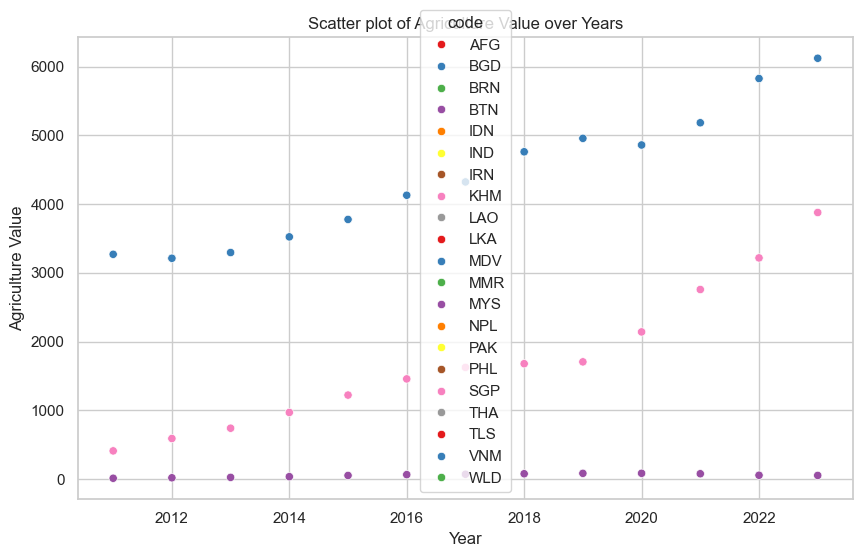